In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
from matplotlib import cm

# Get the data from website

In [100]:
def get_wc3data(url):
    
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    dfs = pd.read_html(page.text)
    return dfs[0]

wc3 = get_wc3data('https://www.unitstatistics.com/warcraft3/')
wc3.head()

,Unit,Race,Gold,Wood,Pop,HP,Armor Type,Armor,Sight,Speed,...,Ground Attack,Damage,Cooldown,DPS,Range,Air Attack,Damage.1,Cooldown.1,DPS.1,Range.1
0,Peasant,Human,75,0,1,220,Medium,0,80,190,...,Normal,5.50,2.00,2.75,0,-,-,-,-,-
1,Militia,Human,-,-,1,220,Heavy,4,140,270,...,Normal,12.50,1.20,10.42,0,-,-,-,-,-
2,Footman,Human,135,0,2,420,Heavy,2,140,270,...,Normal,12.50,1.35,9.26,0,-,-,-,-,-
3,Rifleman,Human,205,30,3,535,Medium,0,140,270,...,Pierce,21.00,1.50,14.00,40,Pierce,21.00,1.50,14.00,60
4,Knight,Human,245,60,4,835,Heavy,5,140,350,...,Normal,34.00,1.40,24.29,0,-,-,-,-,-


In [6]:
wc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unit           71 non-null     object
 1   Race           71 non-null     object
 2   Gold           71 non-null     object
 3   Wood           71 non-null     object
 4   Pop            71 non-null     object
 5   HP             71 non-null     int64 
 6   Armor Type     71 non-null     object
 7   Armor          71 non-null     object
 8   Sight          71 non-null     int64 
 9   Speed          71 non-null     object
 10  Time           71 non-null     object
 11  Ground Attack  71 non-null     object
 12  Damage         71 non-null     object
 13  Cooldown       71 non-null     object
 14  DPS            71 non-null     object
 15  Range          71 non-null     object
 16  Air Attack     71 non-null     object
 17  Damage.1       71 non-null     object
 18  Cooldown.1     71 non-null     o

# Preprocess the data

In [179]:
def preprocess_data(df):
    
    # get the numeric columns
    df_num = df[['Gold', 'Wood', 'Pop', 'HP', 'Armor', 'Sight', 'Speed', 'Time',
               'Damage', 'Cooldown', 'DPS', 'Range',
              'Damage.1', 'Cooldown.1', 'DPS.1', 'Range.1']]
    
    # get the categorical columns by dropping the numeric columns
    df_cat = df.drop(columns=wc3_num.columns.to_list(), axis=1)
    
    # replace the '-' in numeric columns with 0
    df_num = df_num.replace('-', 0)
    df_num = df_num.astype(float)
    
    # repalce the '-' in categorical columns with 'n/a'
    df_cat = df_cat.replace('-', 'n/a')
    
    return (df_num, df_cat, pd.concat([wc3_cat, wc3_num], axis=1))

wc3_num, wc3_cat, wc3_new = preprocess_data(wc3)
wc3_new.head()

,Unit,Race,Armor Type,Ground Attack,Air Attack,Gold,Wood,Pop,HP,Armor,...,Speed,Time,Damage,Cooldown,DPS,Range,Damage.1,Cooldown.1,DPS.1,Range.1
0,Peasant,Human,Medium,Normal,n/a,75.0,0.0,1.0,220.0,0.0,...,190.0,15.0,5.5,2.00,2.75,0.0,0.0,0.0,0.0,0.0
1,Militia,Human,Heavy,Normal,n/a,0.0,0.0,1.0,220.0,4.0,...,270.0,0.0,12.5,1.20,10.42,0.0,0.0,0.0,0.0,0.0
2,Footman,Human,Heavy,Normal,n/a,135.0,0.0,2.0,420.0,2.0,...,270.0,20.0,12.5,1.35,9.26,0.0,0.0,0.0,0.0,0.0
3,Rifleman,Human,Medium,Pierce,Pierce,205.0,30.0,3.0,535.0,0.0,...,270.0,26.0,21.0,1.50,14.00,40.0,21.0,1.5,14.0,60.0
4,Knight,Human,Heavy,Normal,n/a,245.0,60.0,4.0,835.0,5.0,...,350.0,45.0,34.0,1.40,24.29,0.0,0.0,0.0,0.0,0.0


# Check the distribution variables
## Categorical variables

In [84]:
def check_cat(df):
    
    # check the number of unique variables in each column
    for column in df.columns:
        print('The number of unique values in {} is {}.'.format(column, len(df[column].unique())))
        print('And the unique values are {}. \n\n------'.format(df[column].unique()))
        
    return None

check_cat(wc3_cat)

The number of unique values in Unit is 71.
And the unique values are ['Peasant' 'Militia' 'Footman' 'Rifleman' 'Knight' 'Priest' 'Sorceress'
 'Spell Breaker' 'Flying Machine' 'Mortar Team' 'Siege Engine'
 'Gryphon Rider' 'Dragonhawk Rider' 'Water Elemental 1'
 'Water Elemental 2' 'Water Elemental 3' 'Phoenix' 'Peon' 'Grunt'
 'T. Headhunter' 'T. Berserker' 'Demolisher' 'Raider' 'Tauren' 'Shaman'
 'Witch Doctor' 'Spirit Walker' 'Kodo Beast' 'Wind Rider' 'Troll Batrider'
 'Spirit Wolf' 'Dire Wolf' 'Shadow Wolf' 'Serpent Ward' 'Wisp' 'Archer'
 'Huntress' 'Glaive Thrower' 'Dryad' 'DoC Druid Form' 'DoC Bear Form'
 'Mountain Giant' 'Mountain Giant 2' 'Hippogryph' 'DoT Druid Form'
 'DoT Crow Form' 'Faerie Dragon' 'Hippogryph Rider' 'Chimaera'
 'Chimaera 2' 'Treant' 'Avatar of Vengeance' 'Spirit of Vengeance'
 'Acolyte' 'Ghoul' 'Crypt Fiend' 'Gargoyle' 'Abomination' 'Meat Wagon'
 'Necromancer' 'Banshee' 'Frost Wyrm' 'Shade' 'Skeleton Warrior'
 'Skeletal Mage' 'Infernal' 'Carrion Beetle 1' 'Carr

## Numeric variables
### Single value exploration

In [86]:
wc3_num.describe()

,Gold,Wood,Pop,HP,Armor,Sight,Speed,Time,Damage,Cooldown,DPS,Range,Damage.1,Cooldown.1,DPS.1,Range.1
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,132.253521,26.408451,2.267606,553.732394,1.239437,135.915493,279.154930,22.633803,25.176056,1.821268,13.246056,31.950704,12.612676,0.854366,7.645634,22.007042
std,115.098680,30.404218,1.828018,375.831192,1.752262,20.603569,57.712254,18.812792,20.866258,0.761110,9.222315,31.683948,18.722827,0.916398,11.652247,25.296879
min,0.000000,0.000000,0.000000,75.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,300.000000,0.000000,120.000000,270.000000,0.000000,12.000000,1.500000,7.435000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.000000,20.000000,2.000000,435.000000,1.000000,140.000000,270.000000,25.000000,18.000000,1.750000,11.330000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,202.500000,40.000000,3.000000,700.000000,2.000000,140.000000,320.000000,35.000000,34.000000,2.100000,16.970000,50.000000,18.000000,1.675000,11.000000,47.500000
max,425.000000,120.000000,7.000000,1600.000000,10.000000,190.000000,400.000000,65.000000,104.000000,4.500000,48.570000,115.000000,89.000000,3.000000,50.950000,60.000000


array([[<AxesSubplot:title={'center':'Gold'}>,
        <AxesSubplot:title={'center':'Wood'}>,
        <AxesSubplot:title={'center':'Pop'}>,
        <AxesSubplot:title={'center':'HP'}>],
       [<AxesSubplot:title={'center':'Armor'}>,
        <AxesSubplot:title={'center':'Sight'}>,
        <AxesSubplot:title={'center':'Speed'}>,
        <AxesSubplot:title={'center':'Time'}>],
       [<AxesSubplot:title={'center':'Damage'}>,
        <AxesSubplot:title={'center':'Cooldown'}>,
        <AxesSubplot:title={'center':'DPS'}>,
        <AxesSubplot:title={'center':'Range'}>],
       [<AxesSubplot:title={'center':'Damage.1'}>,
        <AxesSubplot:title={'center':'Cooldown.1'}>,
        <AxesSubplot:title={'center':'DPS.1'}>,
        <AxesSubplot:title={'center':'Range.1'}>]], dtype=object)

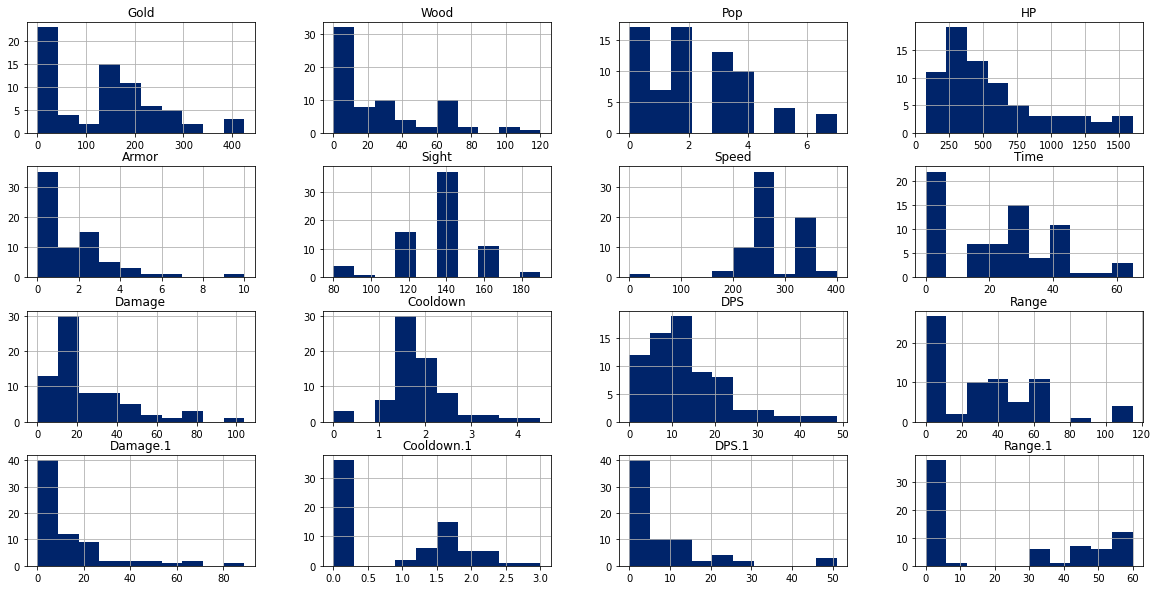

In [143]:
wc3_num.hist(figsize=(20, 10), color='#00246A')

### Pair-wise exploration

[Text(0.5, 0, 'Gold'),
 Text(1.5, 0, 'Wood'),
 Text(2.5, 0, 'Pop'),
 Text(3.5, 0, 'HP'),
 Text(4.5, 0, 'Armor'),
 Text(5.5, 0, 'Sight'),
 Text(6.5, 0, 'Speed'),
 Text(7.5, 0, 'Time'),
 Text(8.5, 0, 'Damage'),
 Text(9.5, 0, 'Cooldown'),
 Text(10.5, 0, 'DPS'),
 Text(11.5, 0, 'Range'),
 Text(12.5, 0, 'Damage.1'),
 Text(13.5, 0, 'Cooldown.1'),
 Text(14.5, 0, 'DPS.1'),
 Text(15.5, 0, 'Range.1')]

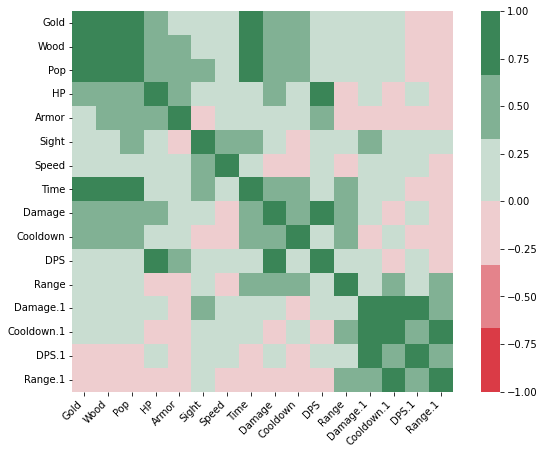

In [142]:
corr = wc3_num.corr()

plt.figure(figsize=(10, 7))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(10, 500),
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

array([[<AxesSubplot:xlabel='Gold', ylabel='Gold'>,
        <AxesSubplot:xlabel='Wood', ylabel='Gold'>,
        <AxesSubplot:xlabel='Pop', ylabel='Gold'>,
        <AxesSubplot:xlabel='HP', ylabel='Gold'>,
        <AxesSubplot:xlabel='Armor', ylabel='Gold'>,
        <AxesSubplot:xlabel='Sight', ylabel='Gold'>,
        <AxesSubplot:xlabel='Speed', ylabel='Gold'>,
        <AxesSubplot:xlabel='Time', ylabel='Gold'>,
        <AxesSubplot:xlabel='Damage', ylabel='Gold'>,
        <AxesSubplot:xlabel='Cooldown', ylabel='Gold'>,
        <AxesSubplot:xlabel='DPS', ylabel='Gold'>,
        <AxesSubplot:xlabel='Range', ylabel='Gold'>,
        <AxesSubplot:xlabel='Damage.1', ylabel='Gold'>,
        <AxesSubplot:xlabel='Cooldown.1', ylabel='Gold'>,
        <AxesSubplot:xlabel='DPS.1', ylabel='Gold'>,
        <AxesSubplot:xlabel='Range.1', ylabel='Gold'>],
       [<AxesSubplot:xlabel='Gold', ylabel='Wood'>,
        <AxesSubplot:xlabel='Wood', ylabel='Wood'>,
        <AxesSubplot:xlabel='Pop', ylabel='

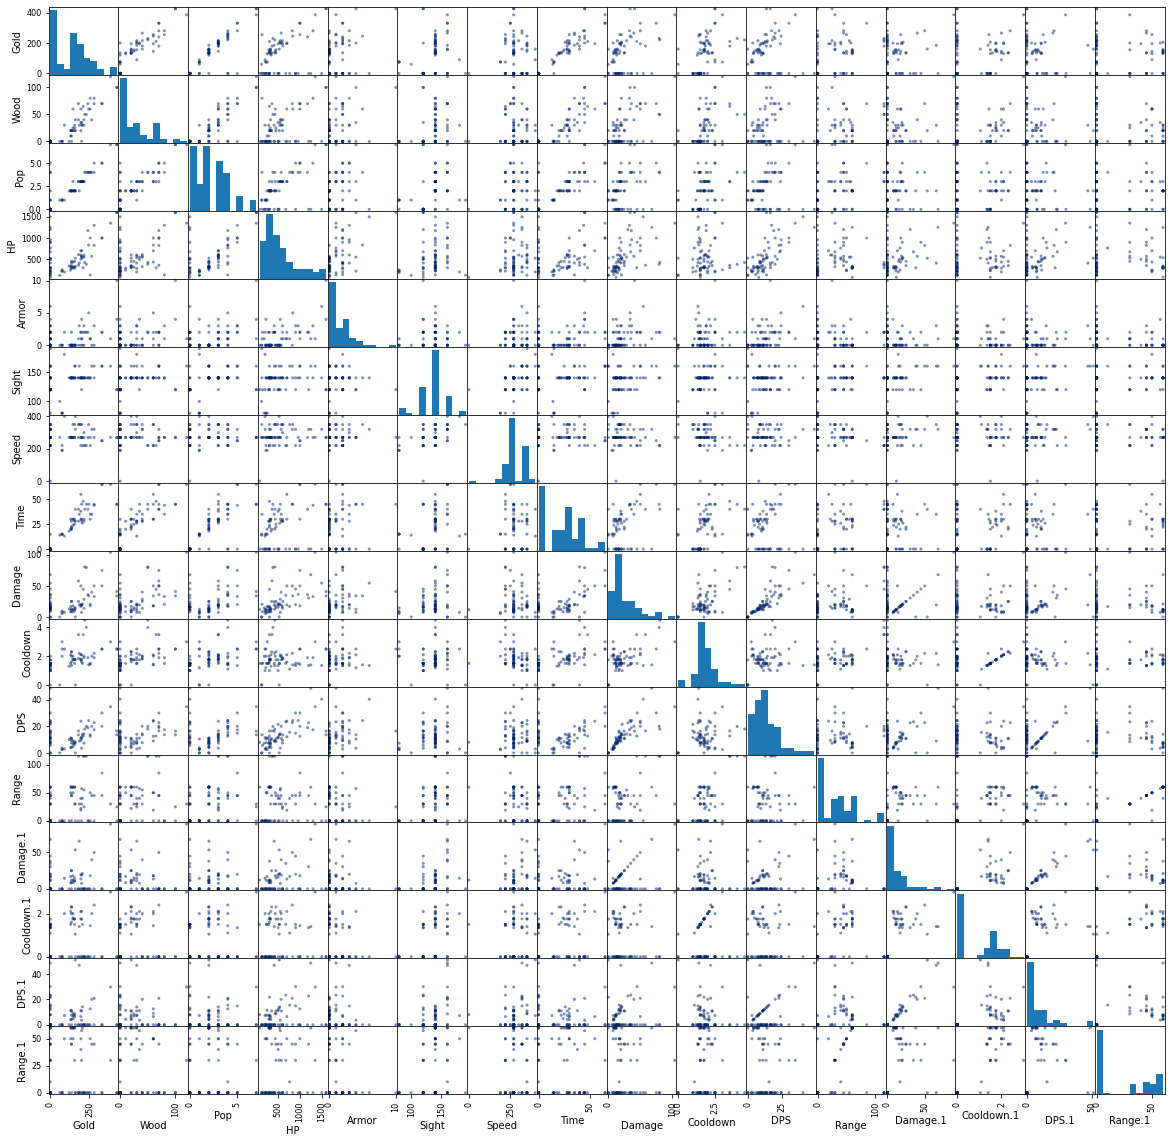

In [149]:
pd.plotting.scatter_matrix(wc3_num, figsize=(20, 20), diagonal='hist', color='#00246A')

# Compare the different capacities of different races
1. Damage ability (damage, cooldown, dps, range)
2. Defense ability (hp, armor)
3. Mobility (speed, sight)
4. Cost (gold, wood, pop, time)

## Compare the damage ability across different races
1. Damage
2. Cooldown
3. DPS
4. Range

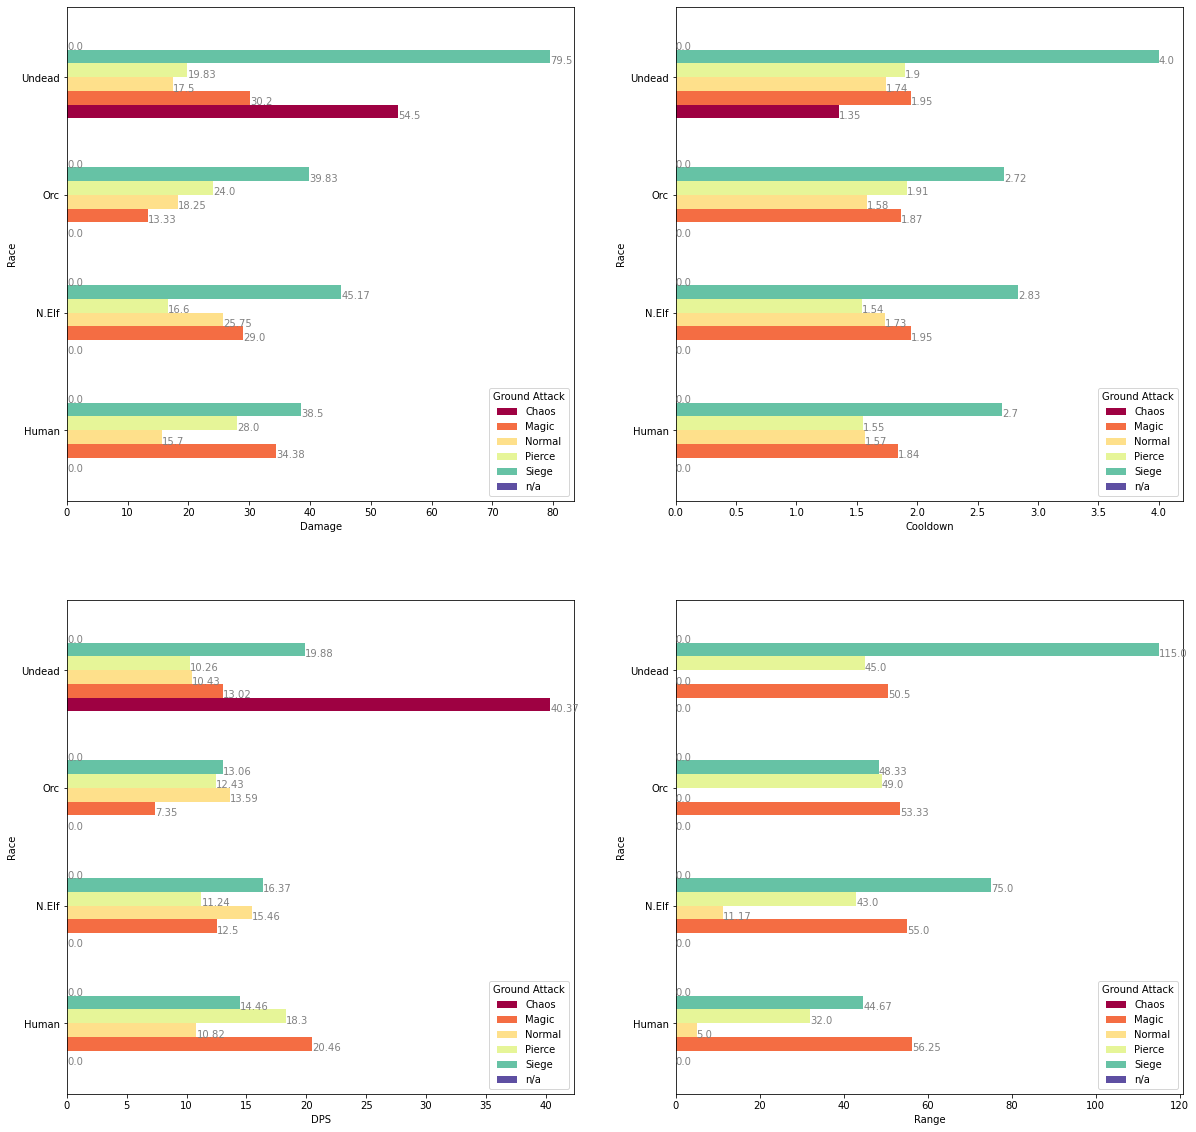

In [329]:
def plot_barh(data, groups, columns, values):
    
    if (len(values) % 2 == 0) & (len(values) > 2):
        fig, axes = plt.subplots(int(len(values)/2), 2, figsize=(20,10*len(values)/2))
    elif len(values) == 2:
        fig, axes = plt.subplots(2, 2, figsize=(20,20)) 
    elif len(values) % 2 == 1:
        fig, axes = plt.subplots(int(len(values)/2)+1, 2, figsize=(20,10*len(values)/2))
        
    cmap = cm.get_cmap('Spectral')
    
    for i, value in enumerate(values):
        
        # create the pv table for visualization
        pv_table = pd.pivot_table(data, index=groups, 
                                  columns=columns, values=value, 
                                  aggfunc=np.mean)
        
        pv_table.plot.barh(ax=axes[int(i/2), i%2], cmap=cmap, width=0.7)
        
        # annotate the bar chart
        for _ in axes[int(i/2), i%2].patches:
            axes[int(i/2), i%2].text(_.get_width(), _.get_y(),
            str(round((_.get_width()), 2)),
            fontsize=10, fontweight='regular',
            color='grey')
        
        # set the x axis's labels
        axes[int(i/2), i%2].set_xlabel(value)
    
    return None

# compare the damage ability across different races
data = wc3_new
groups = ['Race']
columns = ['Ground Attack']
values = ['Damage', 'Cooldown', 'DPS', 'Range']

plot_barh(data, groups, columns, values)       

### Compare the defense ability across different races
1. Armor
2. HP

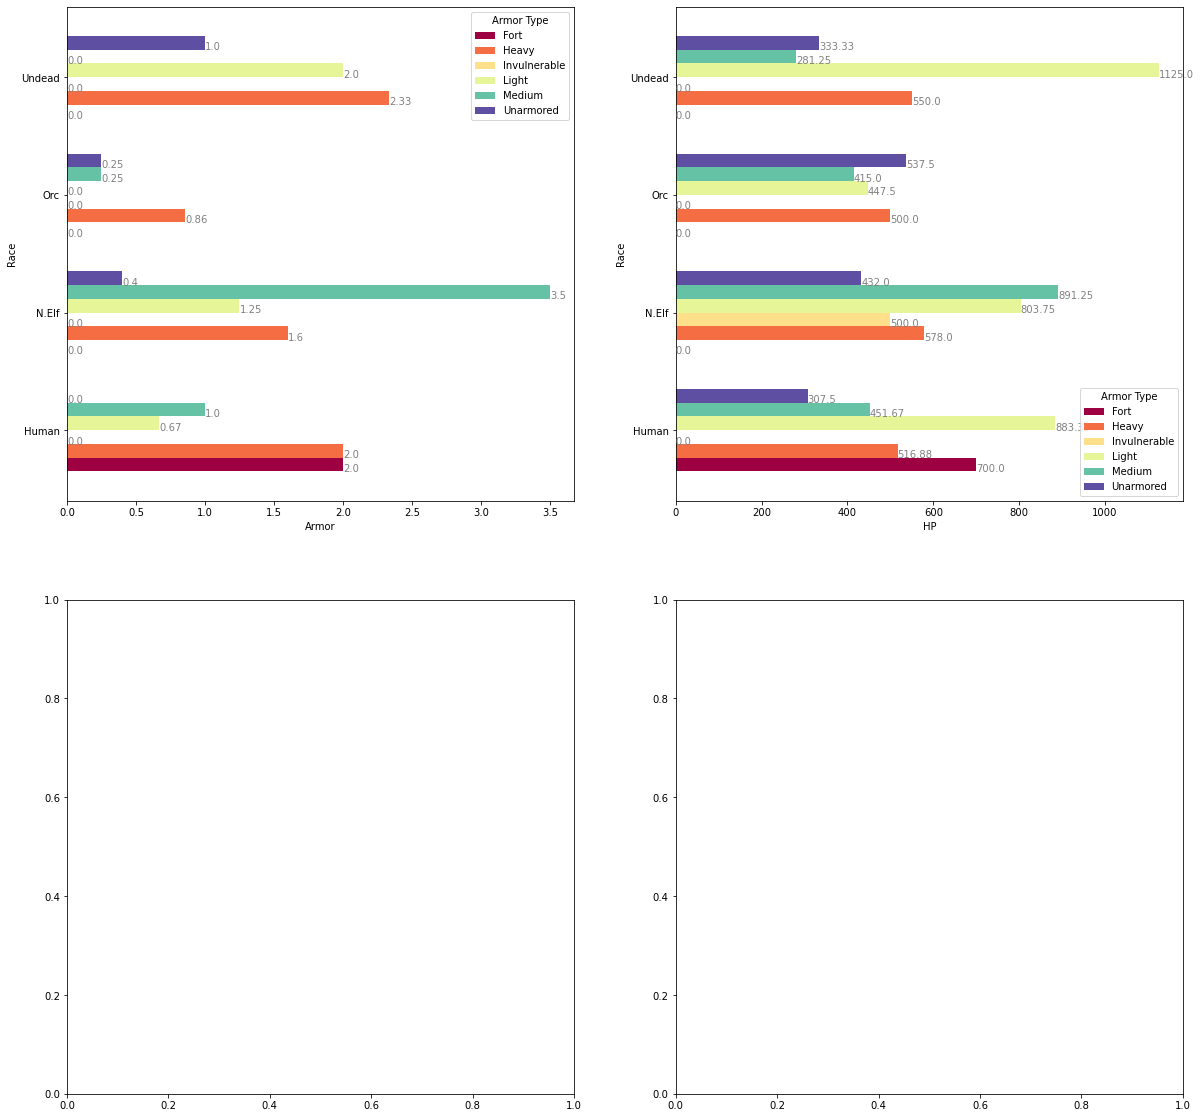

In [330]:
columns = ['Armor Type']
values = ['Armor', 'HP']

plot_barh(data, groups, columns, values)  

### Compare the mobility across different races
1. Speed
2. Sight

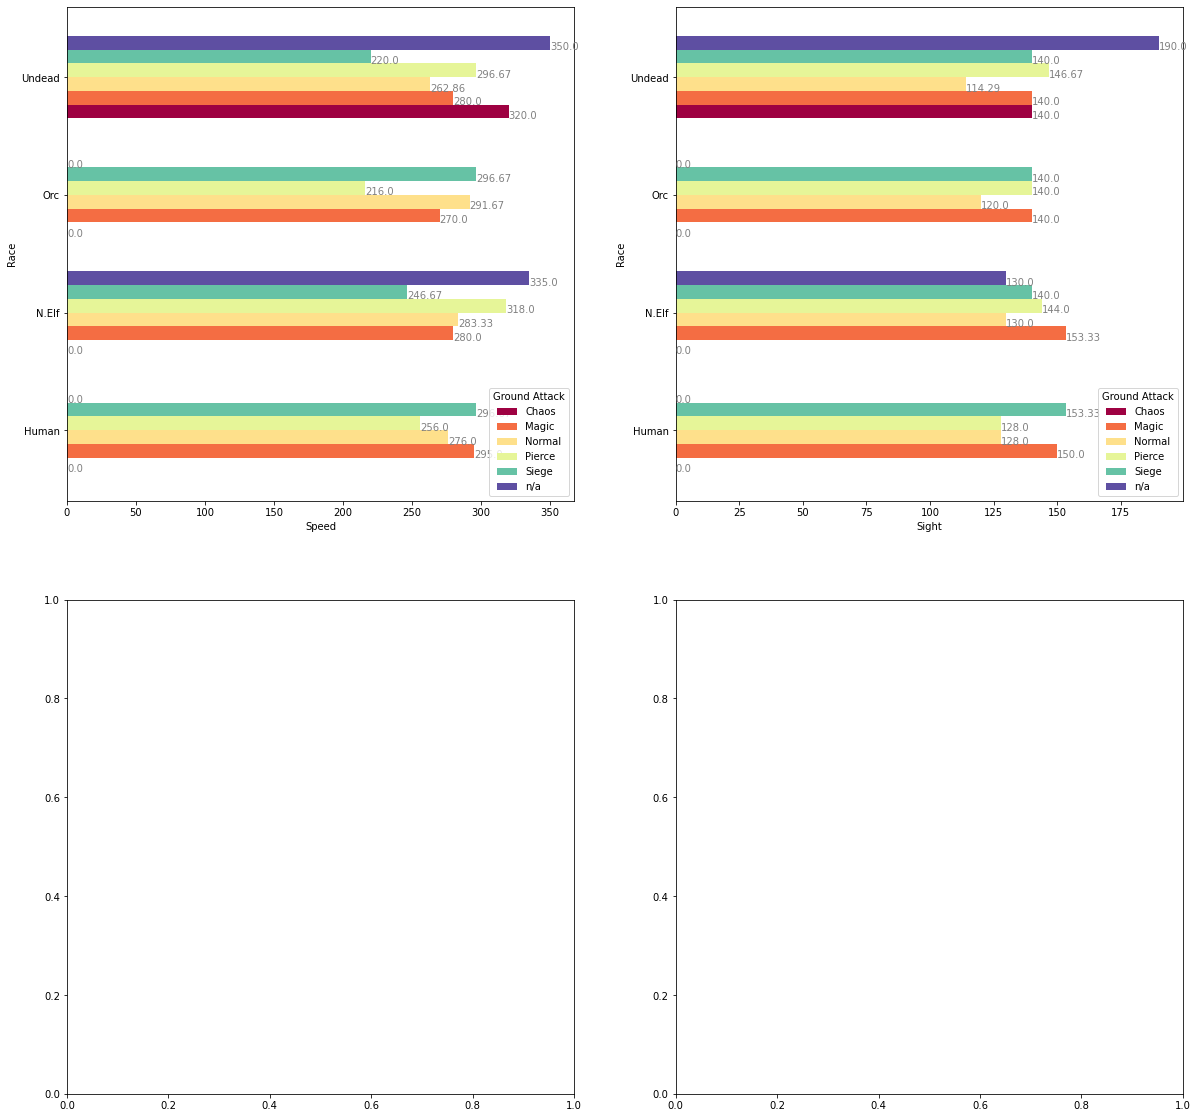

In [331]:
columns = ['Ground Attack']
values = ['Speed', 'Sight']

plot_barh(data, groups, columns, values)  

In [332]:
wc3_new[wc3_new['Ground Attack']=='n/a'][['Unit', 'Sight']]

,Unit,Sight
34,Wisp,100.0
43,Hippogryph,160.0
62,Shade,190.0


### Compare the cost across different races
1. Gold
2. Wood
3. Population
4. Produce time

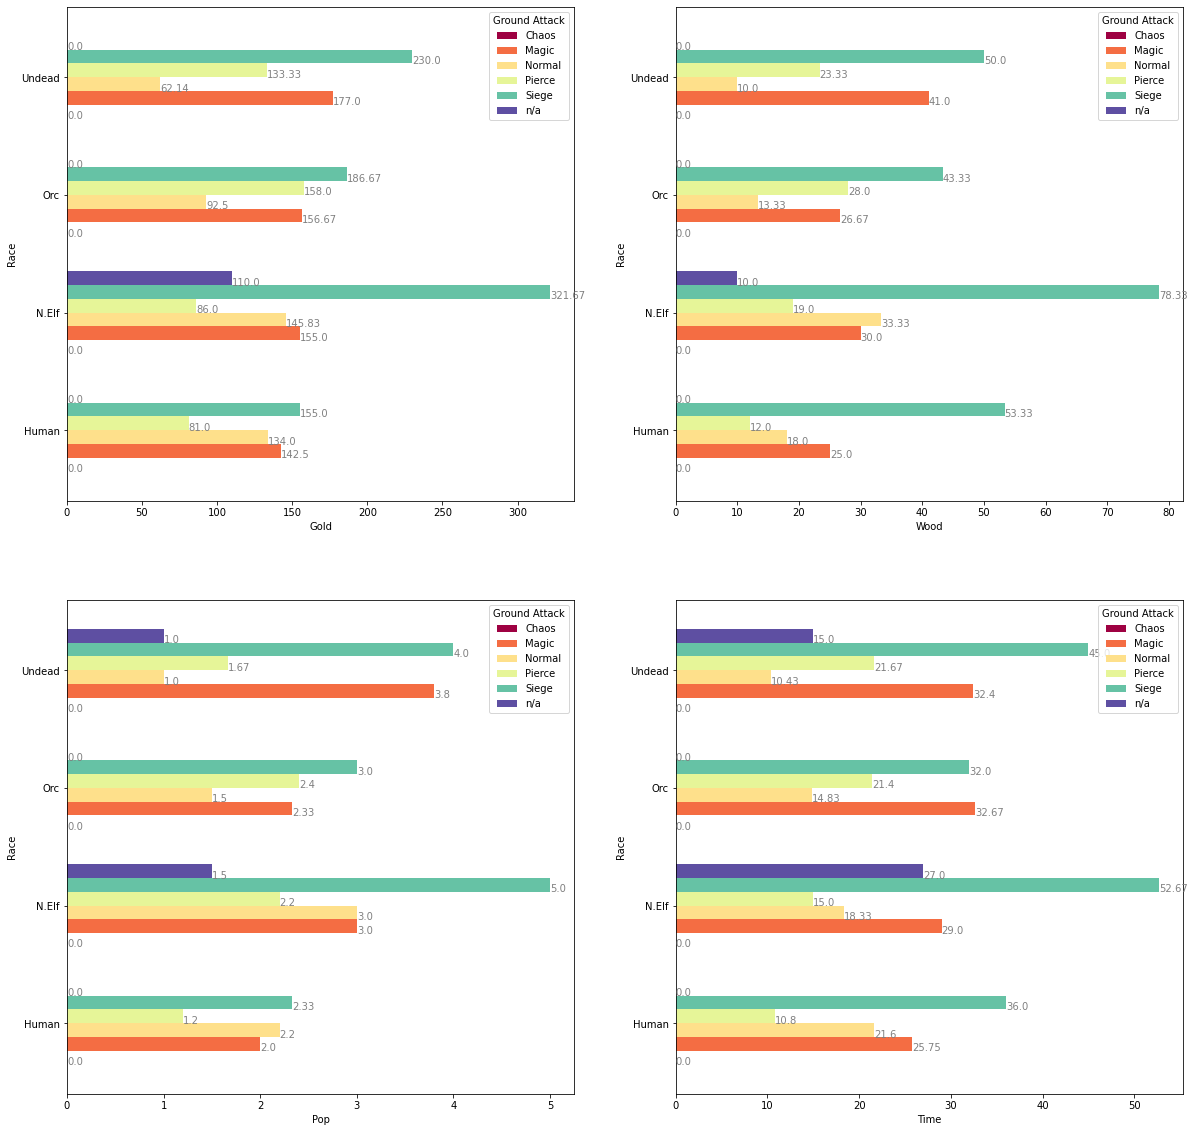

In [333]:
columns = ['Ground Attack']
values = ['Gold', 'Wood', 'Pop', 'Time']

plot_barh(data, groups, columns, values)  

In [296]:
wc3_new.head()

,Unit,Race,Armor Type,Ground Attack,Air Attack,Gold,Wood,Pop,HP,Armor,...,Speed,Time,Damage,Cooldown,DPS,Range,Damage.1,Cooldown.1,DPS.1,Range.1
0,Peasant,Human,Medium,Normal,n/a,75.0,0.0,1.0,220.0,0.0,...,190.0,15.0,5.5,2.00,2.75,0.0,0.0,0.0,0.0,0.0
1,Militia,Human,Heavy,Normal,n/a,0.0,0.0,1.0,220.0,4.0,...,270.0,0.0,12.5,1.20,10.42,0.0,0.0,0.0,0.0,0.0
2,Footman,Human,Heavy,Normal,n/a,135.0,0.0,2.0,420.0,2.0,...,270.0,20.0,12.5,1.35,9.26,0.0,0.0,0.0,0.0,0.0
3,Rifleman,Human,Medium,Pierce,Pierce,205.0,30.0,3.0,535.0,0.0,...,270.0,26.0,21.0,1.50,14.00,40.0,21.0,1.5,14.0,60.0
4,Knight,Human,Heavy,Normal,n/a,245.0,60.0,4.0,835.0,5.0,...,350.0,45.0,34.0,1.40,24.29,0.0,0.0,0.0,0.0,0.0


In [300]:
wc3_new.loc[wc3_new.Race=='Human', 'Gold']

0      75.0
1       0.0
2     135.0
3     205.0
4     245.0
5     135.0
6     155.0
7     215.0
8      90.0
9     180.0
10    195.0
11    280.0
12    200.0
13      0.0
14      0.0
15      0.0
16      0.0
Name: Gold, dtype: float64